In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models

In [25]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [26]:
import os

image_datasets = {x: datasets.ImageFolder(os.path.join("", x), data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32, shuffle=True) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

In [27]:
# model = models.mobilenet_v2(pretrained=True)
# num_features = model.classifier[1].in_features
# model.classifier[1] = nn.Linear(num_features, len(class_names))

In [28]:
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [63]:
train_loss_arr = []
train_accuracy_arr = []
valid_loss_arr = []
valid_accuracy_arr = []

def train_model(model, criterion, optimizer, device, num_epochs=10):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                # Track history if only in training phase
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                 
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            if phase == "train":  
                train_loss_arr.append(epoch_loss)
                train_accuracy_arr.append(epoch_acc.cpu().numpy())
            if phase == "valid":  
                valid_loss_arr.append(epoch_loss)
                valid_accuracy_arr.append(epoch_acc.cpu().numpy())
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    return model

In [64]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = model.to(device)
# model = train_model(model, criterion, optimizer, device, num_epochs=10)

In [31]:
model = models.mobilenet_v2(pretrained=False)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, len(class_names))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [65]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model = train_model(model, criterion, optimizer, device)

Epoch 1/10
----------
train Loss: 0.3039 Acc: 0.8950
valid Loss: 0.1798 Acc: 0.9378
Epoch 2/10
----------
train Loss: 0.2990 Acc: 0.8945
valid Loss: 0.1753 Acc: 0.9400
Epoch 3/10
----------
train Loss: 0.2921 Acc: 0.8974
valid Loss: 0.1547 Acc: 0.9469
Epoch 4/10
----------
train Loss: 0.2874 Acc: 0.9000
valid Loss: 0.1924 Acc: 0.9325
Epoch 5/10
----------
train Loss: 0.2783 Acc: 0.9035
valid Loss: 0.1543 Acc: 0.9469
Epoch 6/10
----------
train Loss: 0.2606 Acc: 0.9090
valid Loss: 0.2383 Acc: 0.9202
Epoch 7/10
----------
train Loss: 0.2687 Acc: 0.9065
valid Loss: 0.1730 Acc: 0.9397
Epoch 8/10
----------
train Loss: 0.2622 Acc: 0.9116
valid Loss: 0.1541 Acc: 0.9461
Epoch 9/10
----------
train Loss: 0.2574 Acc: 0.9099
valid Loss: 0.1598 Acc: 0.9469
Epoch 10/10
----------
train Loss: 0.2477 Acc: 0.9141
valid Loss: 0.1598 Acc: 0.9493


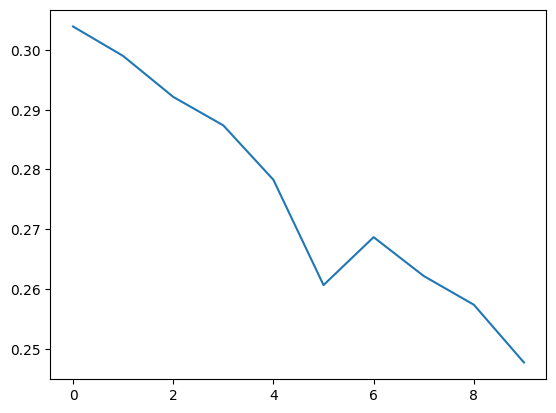

In [66]:
import matplotlib.pyplot as plt

# plt.plot(loss_arr)
# new_acc = [x.cpu().numpy() for x in train_loss_arr]

# plt.plot(new_acc)
plt.plot(train_loss_arr)
# train_accuracy_arr

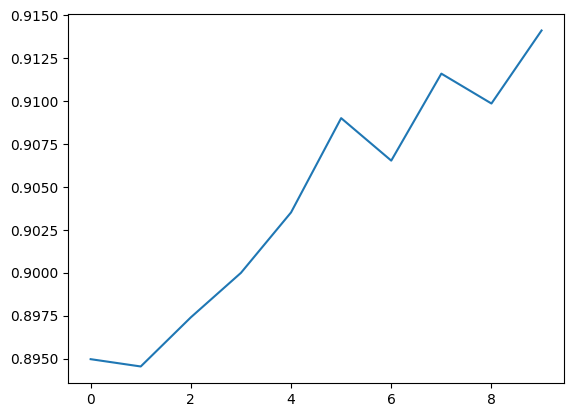

In [67]:
plt.plot(train_accuracy_arr)

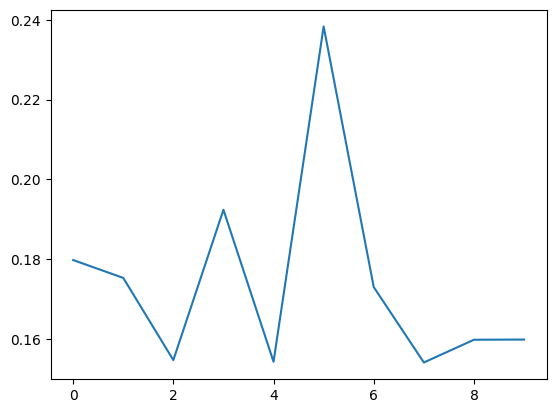

In [68]:
plt.plot(valid_loss_arr)

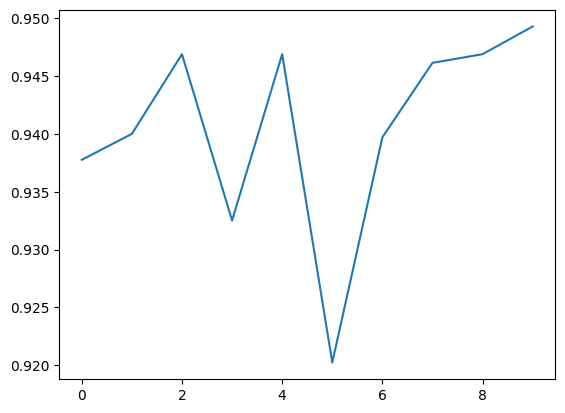

In [69]:
plt.plot(valid_accuracy_arr)

In [70]:
train_loss_arr

[0.3039279958940593,
 0.2989944192886131,
 0.2921462865694504,
 0.28737265125023104,
 0.27826549338781587,
 0.26064573174630185,
 0.2686676304604073,
 0.2621675228019205,
 0.25736162405206264,
 0.2476948146693609]

In [71]:
train_accuracy_arr

[array(0.89496286),
 array(0.89453729),
 array(0.89740019),
 array(0.89999226),
 array(0.90351284),
 array(0.9090065),
 array(0.90653049),
 array(0.91159858),
 array(0.90985763),
 array(0.91411328)]

In [72]:
valid_accuracy_arr

[array(0.93775251),
 array(0.93999701),
 array(0.94688014),
 array(0.93251534),
 array(0.94688014),
 array(0.9202454),
 array(0.93969774),
 array(0.94613198),
 array(0.94688014),
 array(0.94927428)]

In [73]:
valid_loss_arr

[0.17977502211185875,
 0.17530110235808585,
 0.15469574940212646,
 0.19237272945524922,
 0.15428803748986722,
 0.23831707320758438,
 0.17299378499306195,
 0.15410084785208203,
 0.15979960918890293,
 0.15984642843001085]